### Notebook Structure

1. **Business Understanding**  
2. **Data Understanding**  
3. **Data Preparation**  
4. **Modeling**  
5. **Evaluation**  
6. **Conclusion**  
7. **Recommendations**  
8. **Next Steps**  

---

### Business Understanding

In the highly competitive telecommunications industry, customer churn presents a critical challenge. For SyriaTel, customer attrition leads to financial losses and impacts its market reputation. This project focuses on building a machine learning model to predict customer churn effectively. By identifying customers likely to leave, SyriaTel can proactively implement retention strategies to minimize revenue loss and enhance customer satisfaction.

---

### Problem Statement

SyriaTel struggles to retain customers in an intensely competitive market, with customer churn adversely affecting revenue and brand equity. The goal is to develop a predictive model that identifies customers at risk of leaving, enabling the company to take targeted, timely actions to retain them.

---

### Objectives

The primary objective is to create an accurate churn prediction model for SyriaTel. This model will serve as a tool to help reduce churn-related financial losses by enabling proactive and effective customer retention measures.

---

### Data Understanding

**Dataset Overview**  
The dataset, sourced from Kaggle, contains information about 3,333 SyriaTel customers across 21 features. These features cover various aspects such as customer demographics, usage patterns, and interaction history with SyriaTel. Each row corresponds to a customer, while each column represents a specific attribute relevant to predicting churn.

**Significance of Dataset**  
This dataset provides a comprehensive set of features that reflect customer behavior, usage, and service interaction, making it highly relevant for churn prediction. Its real-world applicability and adequate sample size offer a robust foundation for exploration and model development, ultimately supporting the creation of effective customer retention strategies.

---



## Setting Up THe Environment 
The project utilizes Python as the primary programming language, leveraging several powerful libraries to facilitate data analysis and modeling. Key libraries include Pandas and NumPy for data manipulation, Scikit-learn for machine learning, Matplotlib and Seaborn for data visualization, and XGBoost or LightGBM for advanced gradient boosting techniques. Additionally, SHAP is employed to enhance model interpretability. Development is conducted in an interactive environment such as Jupyter Notebook or JupyterLab, which supports iterative analysis. Version control is managed with Git and GitHub to enable seamless collaboration and maintain a clear history of changes throughout the project.

In [2]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



## 1. Data Collection And Understanding
### a. `.info()`
The DataFrame.info() output provides a detailed summary of the dataset, showcasing its structure, column names, data types, and the count of non-null entries in each column.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset is clean with no missing values, providing a solid foundation for analysis. Categorical columns like `state`, `international plan`, and `voice mail plan` will require encoding to be suitable for machine learning models, while numerical features such as `total minutes`, `total calls`, and `total charges` offer critical insights for predicting churn.

### b. `.describe()`
We are going to find  a summury of key statistical metrics for numerical columns ,which will help in understanding the data's distribution and identify potential ouliers and trends .

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The numerical features in the dataset should be normalized or standardized to address differences in scale, ensuring fair treatment during modeling. Columns with low variability may provide limited information and should be reviewed for potential removal.  Additionally, assessing feature importance will help identify the variables most influential in predicting customer churn, enabling a more targeted and effective model.

### c. Target Variable Distribution 
We are going to analyze the distribution of churn to identify class imbalance 


In [5]:
# Check distribution of churn
churn_counts = df['churn'].value_counts()
print(churn_counts)


churn
False    2850
True      483
Name: count, dtype: int64


There are significantly more non-churned customers (2850) than churned ones (483) hence we must address it since this imbalance will affect the machine learning model

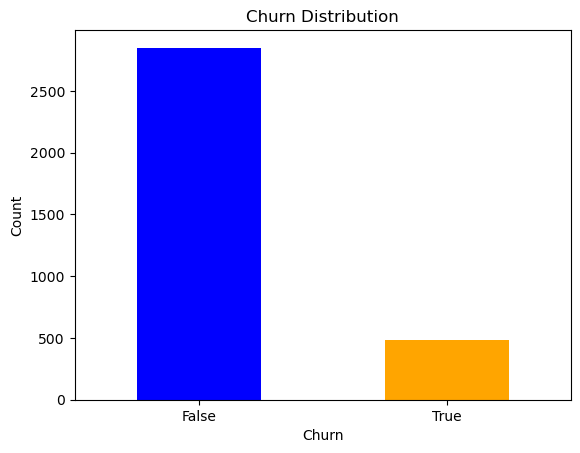

In [6]:


df['churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## 2. DATA CLEANING AND PREPROCESSING

### a. Checking For Missing Values
    

In [7]:
# Checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Since there are no missing values,  there is no need to use imputation techniques such as filling missing values with the mean, median, mode, or using predictive models.


### b. Feature Selection and Engineering
#### I. Removing Irrelevant Features
We remove irrelevant features (such as a column like phone number) because they do not contribute to the predictive power of the model. Instead, they may introduce noise or unnecessary complexity. Here's why and how this is significant:

In [8]:
# Drop non-predictive columns
df = df.drop(['phone number'], axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


####   II.Creating New Features:
Combining related features captures the overall impact they have on the target variable. For example, the total number of calls might better reflect a customer’s engagement with the service.We will Calculate **total calls** by summing **total day calls**, **total eve calls**, **total night calls**, and **total intl calls**.Similarly, create ***total_minutes*** and ***total_charge***.


In [9]:
# Create new features
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,303,717.2,75.56
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,332,625.2,59.24
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,333,539.4,62.29
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,255,564.8,66.80
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,359,512.0,52.09


#### III. Encoding Categorical Variables
Converting categorical variables international plan and voice mail plan to numerical using label encoding .

In [10]:
print(df['international plan'].isnull().sum())
print(df['voice mail plan'].isnull().sum())


0
0


In [11]:
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,303,717.2,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,332,625.2,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,333,539.4,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,255,564.8,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,359,512.0,52.09


 Encoding allows the  models to interpret relationships between categorical variables and the target (churn).

#### IV.  Feature Scaling 
Normalizing or standardizeing numerical features to ensure all features contribute equally to the model.


In [13]:

# Identify numerical columns (excluding categorical or boolean columns)
numerical_columns = [
    'account length', 'number vmail messages', 'total day minutes', 
    'total day calls', 'total day charge', 'total eve minutes', 
    'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 
    'total intl calls', 'total intl charge', 'total_calls', 
    'total_minutes', 'total_charge'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized dataset
df.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,KS,0.676489,415,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,...,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,1,False,-0.062048,1.393531,1.534209
1,OH,0.149065,415,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,...,0.147825,1.059390,1.240482,-0.601195,1.241169,1,False,0.779923,0.370635,-0.019975
2,NJ,0.902529,415,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,...,0.198935,-0.755571,0.703121,0.211534,0.697156,0,False,0.808957,-0.583326,0.270482
3,OH,-0.428590,408,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,...,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,2,False,-1.455655,-0.300918,0.699978
4,OK,-0.654629,415,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,...,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,3,False,1.563827,-0.887971,-0.700883


In [19]:
means = df[numerical_columns].mean()
stds = df[numerical_columns].std()
print("Means after standardization:\n", means)
print("\nStandard deviations after standardization:\n", stds)

Means after standardization:
 account length          -8.527366e-18
number vmail messages   -5.969156e-17
total day minutes       -5.329603e-19
total day calls          3.197762e-18
total day charge         2.131841e-18
total eve minutes       -1.705473e-17
total eve calls          1.545585e-17
total eve charge        -6.395524e-18
total night minutes      1.279105e-17
total night calls       -3.144466e-17
total night charge      -1.918657e-17
total intl minutes       2.984578e-17
total intl calls        -8.527366e-18
total intl charge        2.345026e-17
total_calls             -1.279105e-17
total_minutes           -1.492289e-17
total_charge             7.461445e-18
dtype: float64

Standard deviations after standardization:
 account length           1.00015
number vmail messages    1.00015
total day minutes        1.00015
total day calls          1.00015
total day charge         1.00015
total eve minutes        1.00015
total eve calls          1.00015
total eve charge         1.00015


## 3.EXPLORATORY DATA ANALYSIS (EDA)
#### I.Bivariate analysis 


Creating a boxplot showing how the feature’s distribution varies between churned and non-churned groups.

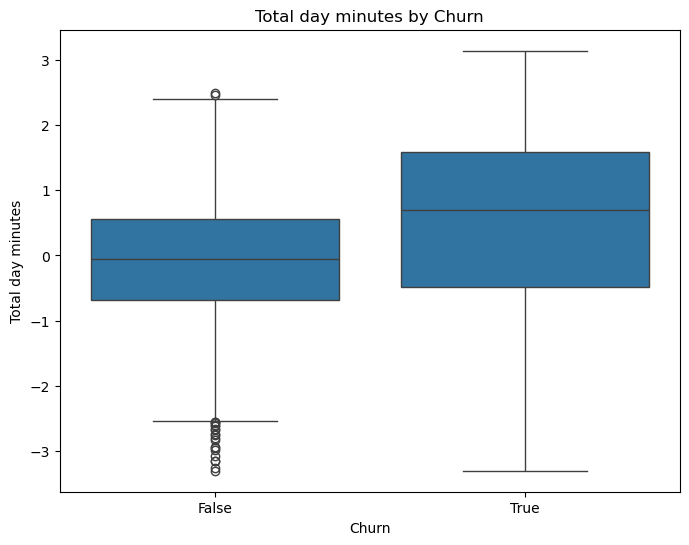

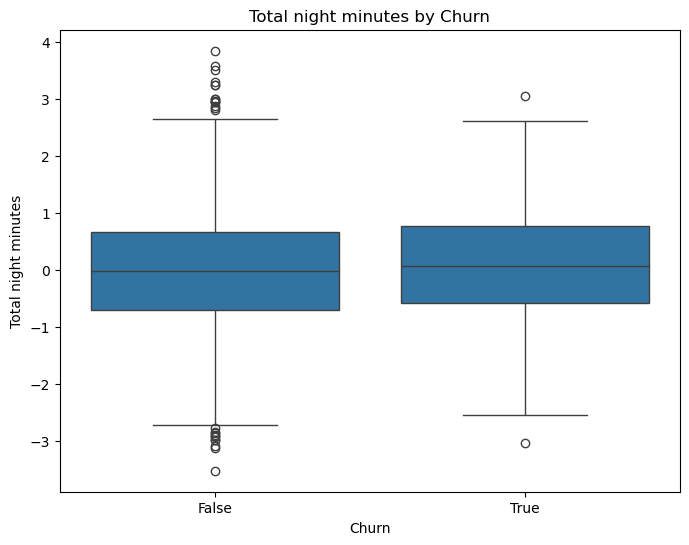

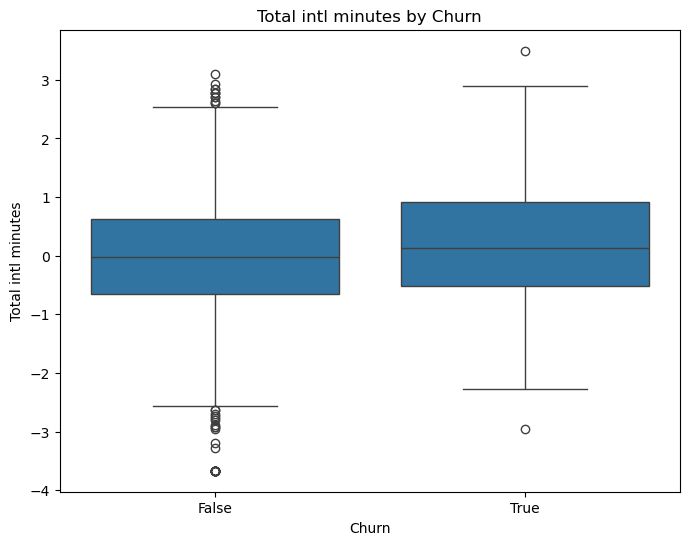

In [22]:

# Selected numerical features
selected_features = ['total day minutes', 'total night minutes', 'total intl minutes']

# Plotting boxplots for each feature grouped by churn
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='churn', y=feature)
    plt.title(f'{feature.capitalize()} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature.capitalize())
    plt.show()

`Total day minutes`appear to be a stronger predictor of churn, as churned customers tend to have higher median day minutes compared to non-churned customers. In contrast, `total night minutes `and `total international minutes` show similar distributions between churned and non-churned customers, suggesting these features have a lesser impact on churn.

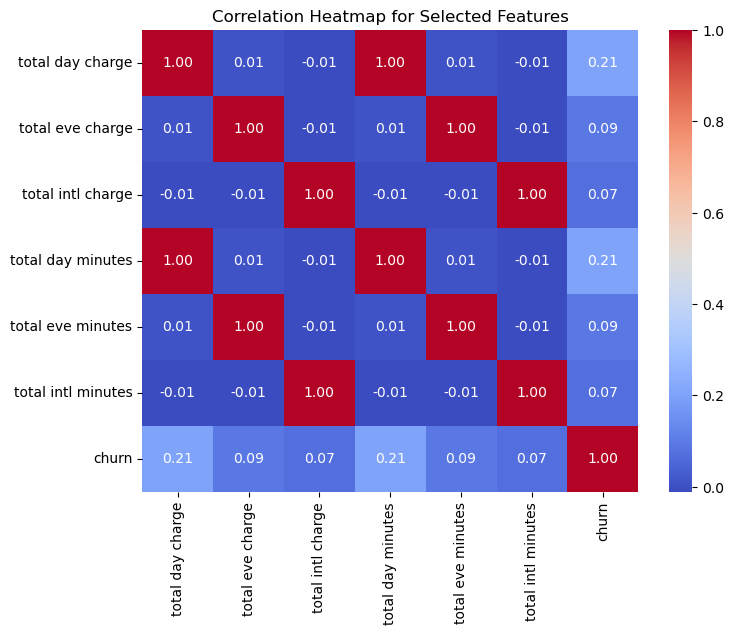

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features of interest
features_of_interest = ['total day charge', 'total eve charge', 'total intl charge', 
                        'total day minutes', 'total eve minutes', 'total intl minutes', 
                        'churn']

# Compute correlation matrix for selected features
correlation_matrix = df[features_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Selected Features')
plt.show()


`total day charge` and `total day minutes`show a mild positive correlation with `churn` (correlation = 0.21).
Customers with higher day charges or minutes may be slightly more likely to churn.

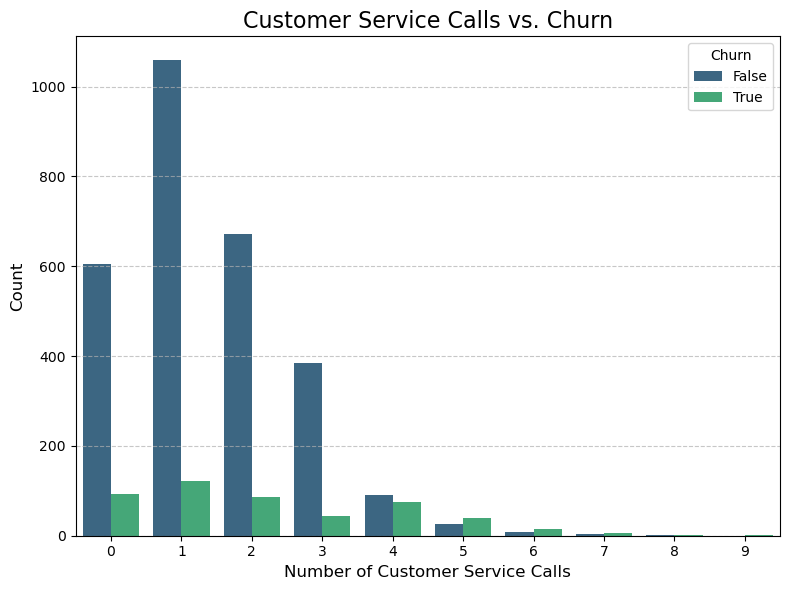

In [24]:


# Create a countplot for Customer Service Calls vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='customer service calls',
    hue='churn',
    palette='viridis'
)
plt.title('Customer Service Calls vs. Churn', fontsize=16)
plt.xlabel('Number of Customer Service Calls', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


A higher number of customer service calls often indicates dissatisfaction, potentially leading to churn. Customers with 1–2 calls may face unresolved issues that prompt them to leave, while those with multiple calls likely experience recurring problems or inadequate resolution, increasing frustration and the likelihood of churn.

## 1. Univariate Analysis
Distribution of Numerical Features:
Using histograms or kernel density plots to visualize the distribution of features like total day minutes, total intl calls, and account length.